# HOTEL REVIEW (NATURAL LANGUAGE PROCCESING) MODEL

Importing Libraries

In [65]:
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import re
import string
from collections import Counter, defaultdict

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [66]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
from wordcloud import WordCloud

from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer, word_tokenize

In [68]:
#Load Dataset
df=pd.read_excel("/content/hotel_reviews.xlsx")
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not 4* experience hotel monaco seat...,3.0
3,"unique, great stay, wonderful time hotel monac...",5.0
4,"great stay great stay, went seahawk game aweso...",5.0
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5.0
20487,great location price view hotel great quick pl...,4.0
20488,"ok just looks nice modern outside, desk staff ...",2.0
20489,hotel theft ruined vacation hotel opened sept ...,1.0


In [69]:
print(f"Theres {df.shape[0]} reviews in this dataset. Lets explore it!")

Theres 20491 reviews in this dataset. Lets explore it!


Our dataset have 20491 rows and 2 columns 

In [70]:
len(df.Review.unique()), df.isna().sum()

(20491, Review    0
 Rating    0
 dtype: int64)

There's no null on this data. This is very good!

# EDA(Exploratory Data Analysis)

The most part of this reviews is about 5 stars rating hotels. 


In [71]:
   #Count plot on the basis of rating
   
x = df.Rating.value_counts().reset_index().rename(columns={'index': 'Rating', 'Rating': 'Count'})
fig = px.bar(x, 
             x="Rating", 
             y="Count", 
             color="Rating", 
             color_continuous_scale=["#EF553B", "#FFA15A", "#FECB52", "#B6E880", "#00CC96"],
             title="Reviews by rating"
            )


fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    margin=dict(l=0,r=0,b=0)
)

fig.update_layout(coloraxis_showscale=False)

fig.show()

Number of review distributed of Ratungs given by customer from 5 to 1

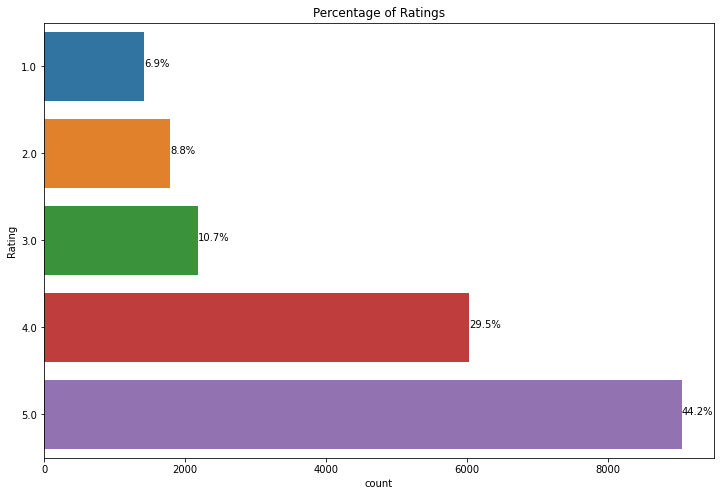

In [72]:
# Count plot on the basis of percentage of rating
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data=df)
total = len(df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

Percentage of review distributed of Ratungs given by customer from 5 to 1

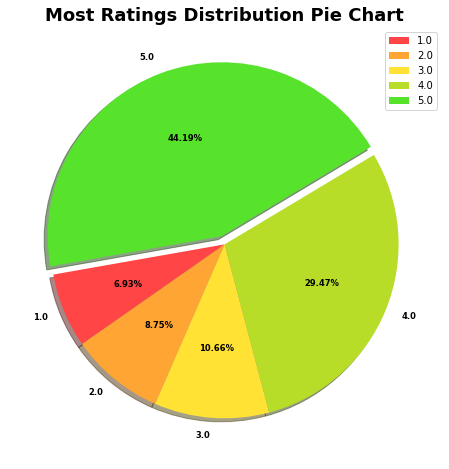

In [73]:
# Pie Chart for the ratings
plt.figure(figsize = (16,8))
plt.pie(df['Rating'].value_counts().sort_index(),
       labels=df['Rating'].value_counts().sort_index().index,
           explode = [0.00,0.0,0.0,0.0,0.05],
       autopct= '%.2f%%',
        colors = ["#ff4545", "#ffa534",'#ffe234','#b7dd29','#57e32c'],
       shadow= True,
       startangle= 190,
       textprops = {'size':'small',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

##Review length by sentiment

In [74]:
df['text_length'] = df.Review.str.len()

fig = px.histogram(df, 
                   x='text_length', 
                   color='Rating', 
                   color_discrete_sequence=["#EF553B","#FFA15A","#B6E880","#FECB52","#00CC96","#EF553B"],
                   title="Review length distributions"
                  )

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    margin=dict(l=0,r=0,b=0)
)

fig.show()

##Review number of words by sentiment

The number of words follow the same characteristic of length.

High rating reviews have greater number of words than lower ratings reviews.

In [75]:
df['number_of_words'] = df.Review.str.split().map(lambda x: len(x))

fig = px.histogram(df, 
                   x='number_of_words', 
                   color='Rating', 
                   color_discrete_sequence=["#EF553B","#FFA15A","#B6E880","#FECB52","#00CC96","#EF553B"],
                   title="Number of words distribution"
                  )

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    margin=dict(l=0,r=0,b=0)
)

fig.show()

In [76]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## WordCloud

For some deep exploratory data analisys, we will plot some wordclouds to observe words used on different ratings.

we exclude from wordcloud common english stopwords and three words that are most used on reviews: hotel, room, not.

As expected: sentiment expressed by words are declined with rating associated. We can point too that basic hotel aspectics like breakfast, bathroom, pool and employees are important to guests rating

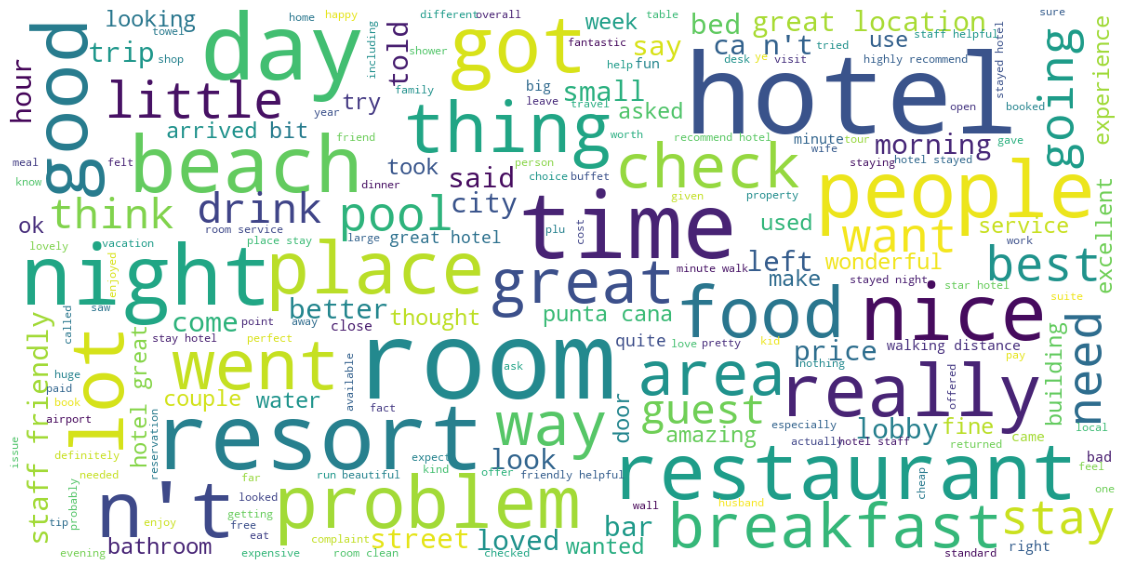

In [77]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 1
    ).generate(" ".join(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df["Review"])

In [78]:
# 1 to 5 rating wordcloud

stops = stopwords.words('english') + ['hotel', 'room', 'not']

w1 = WordCloud(color_func=lambda *args, **kwargs: "#EF553B", 
               background_color='white', 
               max_words=50, 
               stopwords=stops,
               random_state=42,
               height=1000, 
               width=1000) \
            .generate(" ".join(df[df['Rating'] == 1]['Review']))

w2 = WordCloud(color_func=lambda *args, **kwargs: "#FFA15A", 
               background_color='white', 
               max_words=50, 
               stopwords=stops,
               random_state=42,
               height=1000, 
               width=1000) \
            .generate(" ".join(df[df['Rating'] == 2]['Review']))

w3 = WordCloud(color_func=lambda *args, **kwargs: "#FECB52", 
               background_color='white', 
               max_words=50, 
               stopwords=stops,
               random_state=42,
               height=1000, 
               width=1000) \
            .generate(" ".join(df[df['Rating'] == 3]['Review']))

w4 = WordCloud(color_func=lambda *args, **kwargs: "#B6E880", 
               background_color='white', 
               max_words=50, 
               stopwords=stops,
               random_state=42,
               height=1000, 
               width=1000) \
            .generate(" ".join(df[df['Rating'] == 4]['Review']))

w5 = WordCloud(color_func=lambda *args, **kwargs: "#00CC96", 
               background_color='white', 
               max_words=50,
               stopwords=stops,
               random_state=42,
               height=1000, 
               width=1000) \
            .generate(" ".join(df[df['Rating'] == 5]['Review']))



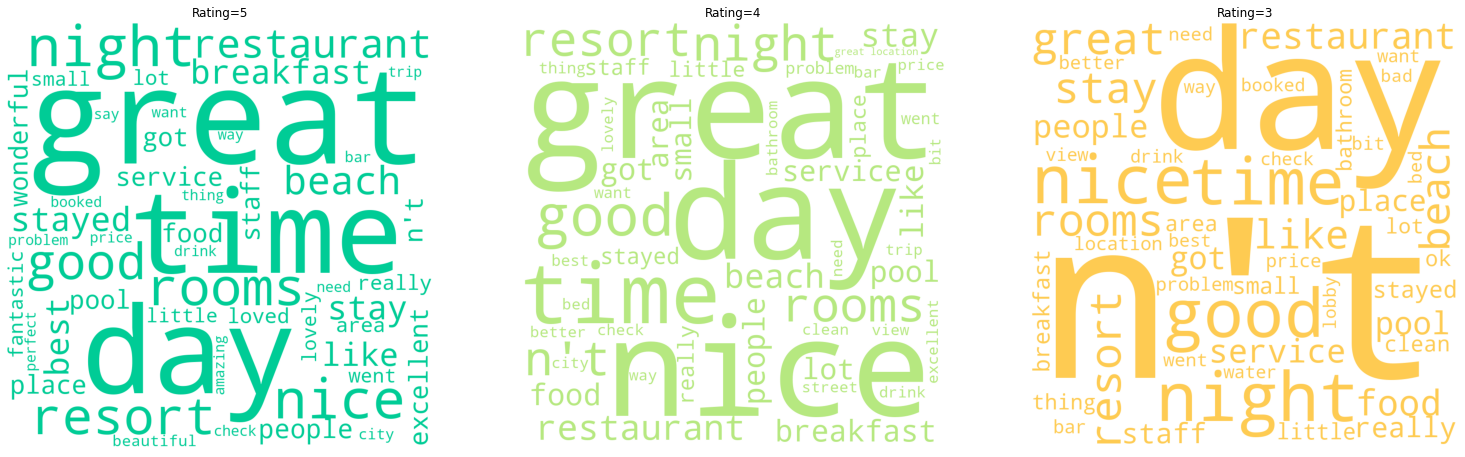

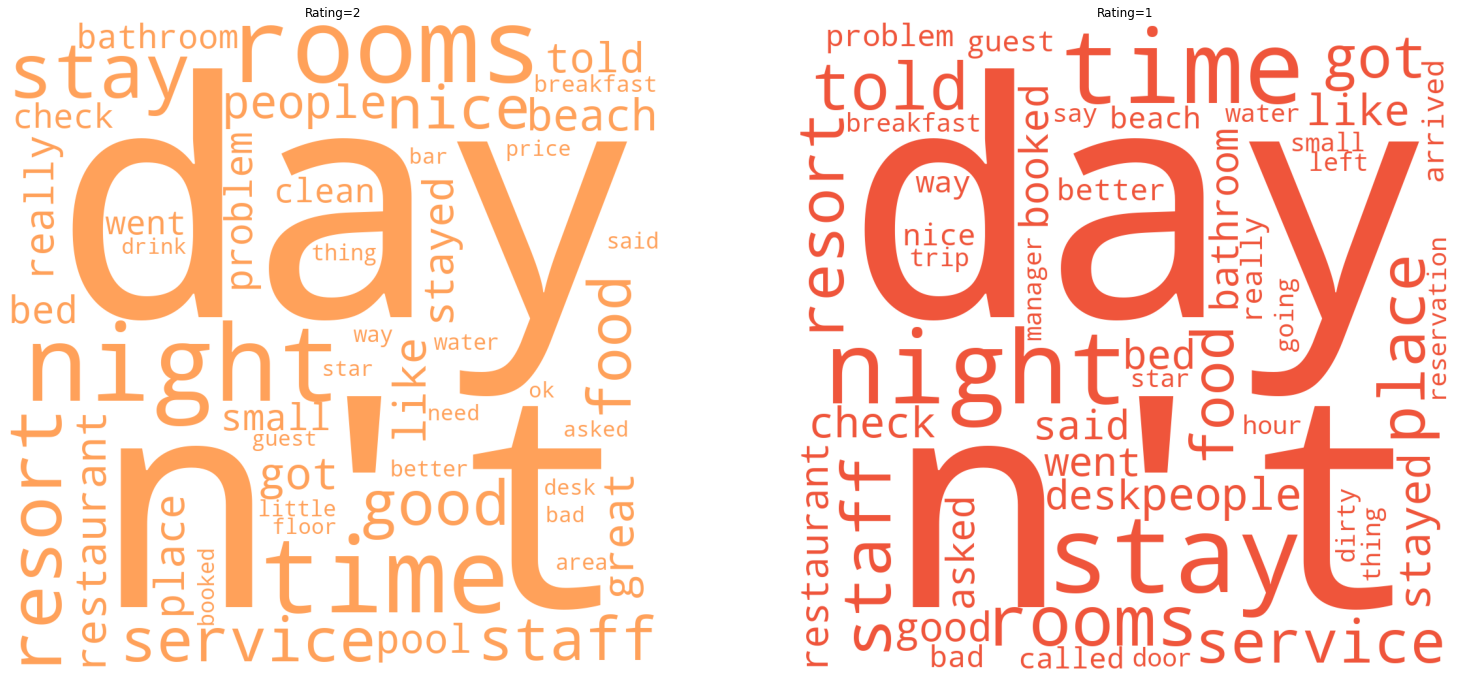

In [79]:
fig = plt.figure(figsize=(26, 12))

fig.add_subplot(1, 3, 1)
plt.axis('off')
plt.title('Rating=5')
plt.imshow(w5)

fig.add_subplot(1, 3, 2)
plt.title('Rating=4')
plt.axis('off')
plt.imshow(w4)

fig.add_subplot(1, 3, 3)
plt.axis('off')
plt.title('Rating=3')
plt.imshow(w3)

fig = plt.figure(figsize=(26, 12))


fig.add_subplot(1, 2, 1)
plt.title('Rating=2')
plt.axis('off')
plt.imshow(w2)

fig.add_subplot(1, 2, 2)
plt.title('Rating=1')
plt.axis('off')
plt.imshow(w1)

We have 20K Reviews in the hotel and the Rating Reviews from 1 to 5

The percentage rating in the data set

5 = 44%

4 = 30%

3 = 10%

2 = 9%

1 = 7%

I see the length reviews has effect in the rating.
Rating 5 = 44% -> satisfy
We see the people satisfy = rating 5 in this words
In general the hotel - room - night - beach - restaurant and food and drink - bed - pool - locations.

Rating 4 = 30% -> satisfy
We see the people satisfy = rating 4 in this words the same rating 5 but plus ...
beautiful hotel - staff friendly - service - street.

Rating 2 = 9% -> unsatisfied
We see the people unsatisfied = rating 2 in this words the same rating 5 & 4 but plus ...
Hotel - staff - beach - srevice - disk - stay - shower

Rating 1 = 7% -> unsatisfied
We see the people unsatisfied = rating 1 in this words the same rating 5 & 4 but plus ...
room - hotel - place - staff - door - check in - sleep - toilet - resort -water.
I see around 75 % from visitors satisfied

## Target Count

In [80]:
# label encode
def label_encode(x):
    if x == 1 or x == 2:
        return 0
    if x == 3:
        return 1
    if x == 5 or x == 4:
        return 2

# label to name
def label2name(x):
    if x == 0:
        return "Negative"
    if x == 1:
        return "Neutral"
    if x == 2:
        return "Positive"        

In [81]:
# encode label and mapping label name
df["label"] = df["Rating"].apply(lambda x: label_encode(x))
df["label_name"] = df["label"].apply(lambda x: label2name(x))

In [82]:

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "bar"}]])
colors = ['#eee50a', '#f90522', '#0aeeda'] 
fig.add_trace(go.Pie(labels=df.label_name.value_counts().index,
                             values=df.label.value_counts().values), 1, 1)

fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.add_trace(go.Bar(x=df.label_name.value_counts().index, y=df.label.value_counts().values, marker_color = colors), 1,2)

fig.show()

###The 200 Most Frequest Words

In [113]:
mostUsedWords = df['Review'].str.split(expand=True).stack().value_counts()
mostUsedWords_top200 = mostUsedWords[:200]

fig = px.treemap(mostUsedWords_top200, path=[mostUsedWords_top200.index], values=0)
fig.update_layout(title_text='The 200 Most Frequest Words',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

In [83]:
# Creating a new feature for the visualization.
df['Character Count'] = df['Review'].apply(lambda x: len(str(x)))


def plot_dist3(df, feature, title):

    # Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(24, 12))

    # Creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])

    # Set the title.
    ax1.set_title('Histogram')
    
    # plot the histogram.
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 color='#e74c3c')
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))


    plt.suptitle(f'{title}', fontsize=24)    

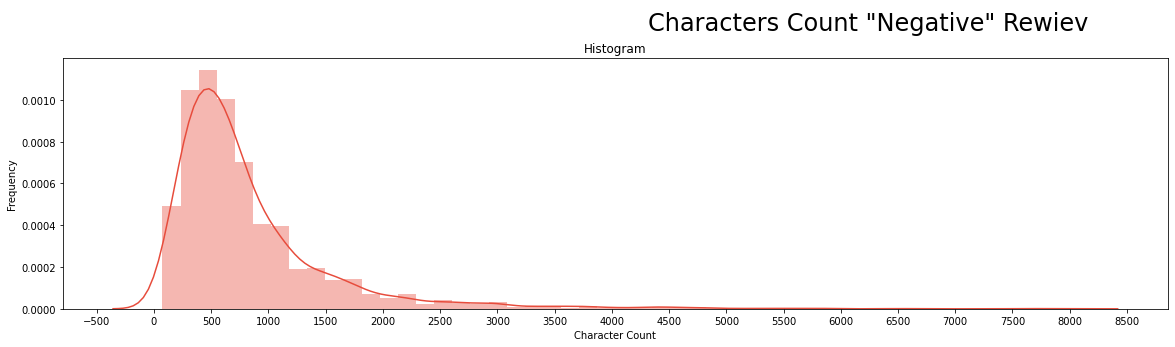

In [84]:
 # for positive review
 plot_dist3(df[df['label'] == 0], 'Character Count',
           'Characters Count "Negative" Rewiev')

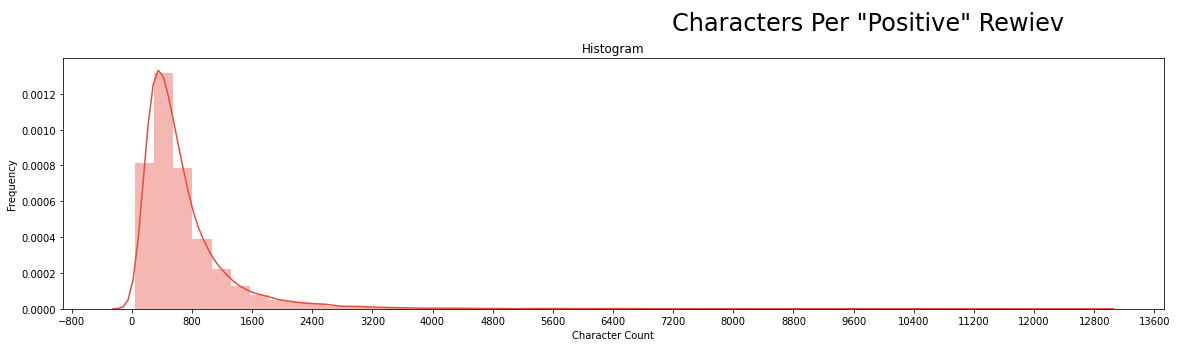

In [85]:
# for negetive review
plot_dist3(df[df['label'] == 2], 'Character Count',
           'Characters Per "Positive" Rewiev')

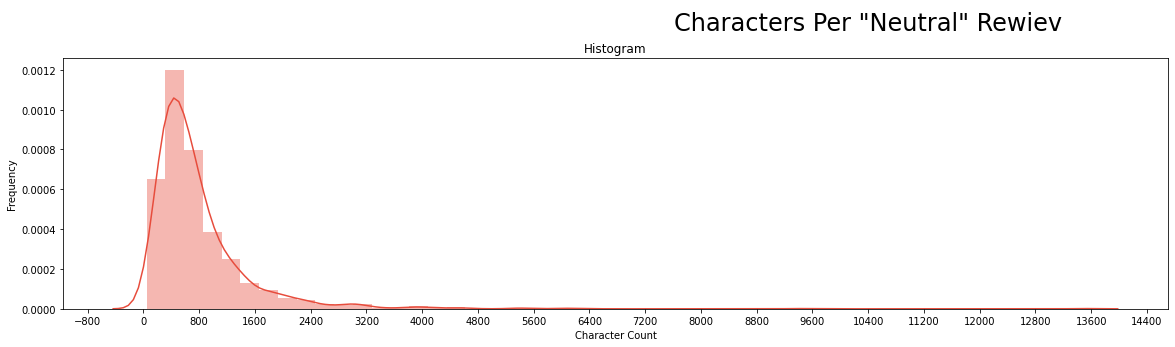

In [86]:
# for Neutral review
plot_dist3(df[df['label'] == 1], 'Character Count',
           'Characters Per "Neutral" Rewiev')

## Natural Language Processing



# 1.  Cleaning



In [87]:
# function for cleaning Review
def standardize_text(df, field):
    df[field] = df[field].str.replace(r"http\S+", "")
    df[field] = df[field].str.replace(r"http","")
    df[field] = df[field].str.replace(r"@/S+","")
    df[field] = df[field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[field] = df[field].str.replace(r"@"," at ")
    df[field] = df[field].str.lower()
    return df

In [88]:
standardize_text(df,"Review")

,Review,Rating,text_length,number_of_words,label,label_name,Character Count
0,nice hotel expensive parking got good deal sta...,4.0,593,87,2,Positive,593
1,ok nothing special charge diamond member hilto...,2.0,1689,250,0,Negative,1689
2,nice rooms not 4 experience hotel monaco seat...,3.0,1427,217,1,Neutral,1427
3,"unique, great stay, wonderful time hotel monac...",5.0,600,89,2,Positive,600
4,"great stay great stay, went seahawk game aweso...",5.0,1281,191,2,Positive,1281
...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5.0,733,109,2,Positive,733
20487,great location price view hotel great quick pl...,4.0,306,39,2,Positive,306
20488,"ok just looks nice modern outside, desk staff ...",2.0,443,63,0,Negative,443
20489,hotel theft ruined vacation hotel opened sept ...,1.0,5557,781,0,Negative,5557


In [89]:
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [90]:
# Applying Lemmmatizer to remove tenses from texts

lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    review = [lemmatizer.lemmatize(word) for word in review]
    review = ' '.join(review)
    corpus.append(review)

In [91]:
corpus[:1]

['nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous review valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillow soundproof like heard music room night morning loud bang door opening closing hear people talking hallway maybe noisy neighbor aveda bath product nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay parking night']

In [92]:
def sentiment(review):
    if review>=3:
        return 1
    else:
        return 0
df['Sentiment']= df['Rating'].apply(sentiment)

In [93]:
df.head(10)

,Review,Rating,text_length,number_of_words,label,label_name,Character Count,Sentiment
0,nice hotel expensive parking got good deal sta...,4.0,593,87,2,Positive,593,1
1,ok nothing special charge diamond member hilto...,2.0,1689,250,0,Negative,1689,0
2,nice rooms not 4 experience hotel monaco seat...,3.0,1427,217,1,Neutral,1427,1
3,"unique, great stay, wonderful time hotel monac...",5.0,600,89,2,Positive,600,1
4,"great stay great stay, went seahawk game aweso...",5.0,1281,191,2,Positive,1281,1
5,love monaco staff husband stayed hotel crazy w...,5.0,1002,134,2,Positive,1002,1
6,"cozy stay rainy city, husband spent 7 nights m...",5.0,748,101,2,Positive,748,1
7,"excellent staff, housekeeping quality hotel ch...",4.0,597,85,2,Positive,597,1
8,"hotel stayed hotel monaco cruise, rooms genero...",5.0,419,59,2,Positive,419,1
9,excellent stayed hotel monaco past w e delight...,5.0,271,35,2,Positive,271,1


## 2. TF-IDF





Tf-idf is meant for rendering more importance to the rare words. It so happens that if you rely on word counts alone, the unimportant words like ‘the’ , ‘and’ etc. will get more importance because they tend to get used more often.

For better understanding of Term Frequency - Inverse Document Frequency(TF-IDF) refer to this.

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 3), max_features=10000, tokenizer = word_tokenize)
X = tfidf.fit_transform(corpus)
y = df['Sentiment']

In [95]:
# Splitting data into Train & Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=24)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15368, 10000)
(15368,)
(5123, 10000)
(5123,)


# 3. Model Training

Logistic Regression





In [96]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9223111458130002

XG Boost

In [97]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier()

In [98]:
xgb.score(X_test, y_test)

0.9002537575639273

LightGBM

In [99]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
lgb.score(X_test, y_test)

0.925434315830568

Multilayer Perceptron(MLP) ClassifieR

In [100]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(verbose=True)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.41673637
Iteration 2, loss = 0.21510855
Iteration 3, loss = 0.13006714
Iteration 4, loss = 0.09263757
Iteration 5, loss = 0.06748819
Iteration 6, loss = 0.04923086
Iteration 7, loss = 0.03605149
Iteration 8, loss = 0.02637500
Iteration 9, loss = 0.01937189
Iteration 10, loss = 0.01462932
Iteration 11, loss = 0.01142885
Iteration 12, loss = 0.00920148
Iteration 13, loss = 0.00763054
Iteration 14, loss = 0.00647672
Iteration 15, loss = 0.00565298
Iteration 16, loss = 0.00500881
Iteration 17, loss = 0.00450453
Iteration 18, loss = 0.00411285
Iteration 19, loss = 0.00380612
Iteration 20, loss = 0.00354677
Iteration 21, loss = 0.00333621
Iteration 22, loss = 0.00315755
Iteration 23, loss = 0.00300973
Iteration 24, loss = 0.00288048
Iteration 25, loss = 0.00277011
Iteration 26, loss = 0.00267456
Iteration 27, loss = 0.00258785
Iteration 28, loss = 0.00251521
Iteration 29, loss = 0.00244659
Iteration 30, loss = 0.00238663
Iteration 31, loss = 0.00233122
Iteration 32, los

MLPClassifier(verbose=True)

In [101]:
mlp.score(X_test, y_test)

0.9242631270739801

Naive Bayes classifier

In [102]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

y_pred = naive_bayes_classifier.predict(X_test)

accuracy_score(y_pred,y_test)

0.9115752488776108

Out of all the Models we used,LightGBM Model with 92.54% & MLP model performes b with Accuracy of 92.40%. So, we are considering LightGBM Model & MLP Classifier Model for prediction

# Prediction & Accuracy

LightGBM Model

In [103]:
y_pred = lgb.predict(X_test)

              precision    recall  f1-score   support

           0       0.64      0.85      0.73       612
           1       0.98      0.94      0.96      4511

    accuracy                           0.93      5123
   macro avg       0.81      0.89      0.84      5123
weighted avg       0.94      0.93      0.93      5123

Accuracy of LightGBM Model: 92.5434315830568%


Text(0.5, 1.0, 'Confusion Matrix for LightGBM Model')

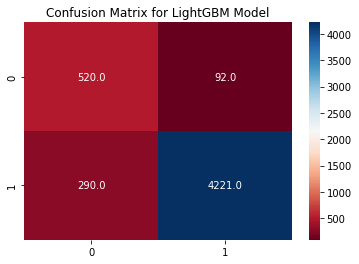

In [104]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_pred, y_test)
print(report)
cm = confusion_matrix(y_pred, y_test)
print("Accuracy of LightGBM Model: {}%".format(acc*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for LightGBM Model")

MLP model

In [105]:
y_pred = mlp.predict(X_test)

              precision    recall  f1-score   support

           0       0.70      0.80      0.74       708
           1       0.97      0.94      0.96      4415

    accuracy                           0.92      5123
   macro avg       0.83      0.87      0.85      5123
weighted avg       0.93      0.92      0.93      5123

Accuracy of MLP Model: 92.42631270739801%


Text(0.5, 1.0, 'Confusion Matrix for MLP Model')

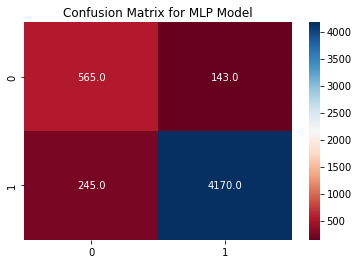

In [106]:
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_pred, y_test)
print(report)
cm = confusion_matrix(y_pred, y_test)
print("Accuracy of MLP Model: {}%".format(acc*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for MLP Model")

## ROC_AUC Score and Curves

The receiver operating characteristic (ROC) curve is a plot of the pairs of true positive rates (y-axis) and false positive rates (x-axis) that result from lowering the threshold down from 1, all the way to 0.

In [107]:
# LightGBM

from sklearn.metrics import roc_auc_score,roc_curve
y_pred_proba = lgb.predict_proba(X_test)
pos_proba = y_pred_proba[:,1]

Text(0.5, 1.0, 'ROC curve for LightGBM Classifier')

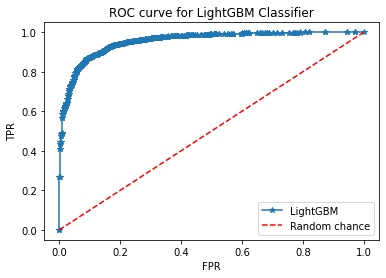

In [108]:
fpr, tpr,thersholds = roc_curve(y_test, pos_proba)
plt.plot(fpr, tpr, "*-")
plt.plot([0,1],[0,1],'r--')
plt.legend(['LightGBM','Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for LightGBM Classifier')

In [109]:
roc_auc_score(y_test , pos_proba)

0.9547477766041798

In [110]:
# MLP classfier

y_pred_proba1 = mlp.predict_proba(X_test)
pos_proba1 = y_pred_proba1[:,1]

Text(0.5, 1.0, 'ROC curve for MLP Classifier')

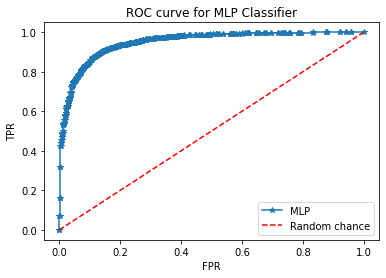

In [111]:
fpr, tpr, thersholds = roc_curve(y_test, pos_proba1)
plt.plot(fpr, tpr, "*-")
plt.plot([0,1],[0,1],'r--')
plt.legend(['MLP', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for MLP Classifier')

In [112]:
roc_auc_score(y_test, pos_proba1)

0.9491311080769308

Values closer to 1 in roc_auc_score shows that both LightGBM amd MLP classifier is efficient and gives better performance.